In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Churn_Modelling.csv", na_values = ["?","#","$","%","na"])

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df = df.drop(['RowNumber','CustomerId'],axis=1)

In [9]:
df = df.drop(['Surname'],axis=1)

<AxesSubplot:>

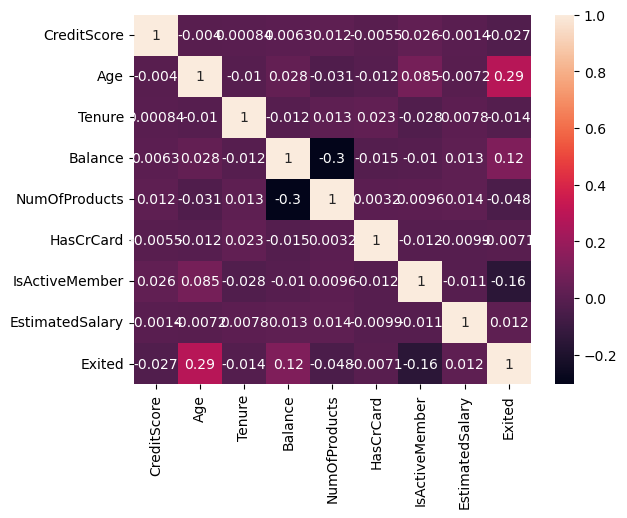

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
#Encoding
df.select_dtypes("object")

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df.Geography = le.fit_transform(df.Geography)
df.Gender = le.fit_transform(df.Gender)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
logr_model = LogisticRegression()

In [18]:
logr_model.fit(X_train,y_train)

LogisticRegression()

In [19]:
logr_model.score(X_test,y_test)*100

80.05

In [20]:
from sklearn.svm import SVC
svm_model = SVC()

In [21]:
svm_model.fit(X_train,y_train)

SVC()

In [22]:
svm_model.score(X_test,y_test)*100

80.35

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [24]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
rf.score(X_test,y_test)*100

86.5

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [27]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)*100

76.4

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1_scaled = ss.fit_transform(X_train)
X2_scaled = ss.fit_transform(X_test)
X1_scaled

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [29]:
knn.fit(X1_scaled,y_train)
knn.score(X2_scaled,y_test)*100

82.95

In [30]:
rf.fit(X1_scaled,y_train)
rf.score(X2_scaled,y_test)*100

86.75

20% of data is too small to be confident about prediction<br>
we are not validating out predictions on the remaining 80% of the data as we have trained our model on it.<br>
k fold cross validation solves these issues

In [31]:
from sklearn.model_selection import cross_val_score

#crocross_val_score(estimator,x,y,cv=5)

cross_val_score(SVC(C=10, kernel='rbf', gamma="auto"),X,y,cv=5)

array([0.796 , 0.796 , 0.7965, 0.7965, 0.7965])

In [35]:
np.average(cross_val_score(SVC(C=10, kernel='rbf', gamma="auto"),X,y,cv=5))

0.7963

In [ ]:
cvals = [1,10,15,20]
kvals = ["rbf","linear"]

average_data={}

for k in kvals:
    for c in cvals:
        avg = cross_val_score(SVC(C=c, kernel=k,gamma="auto"),X,y,cv=5)
        average_data[k + "-" + str(c)] = np.average(avg)
average_data

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SVC(),
                  {
                      "C":[1,10,20,30],
                      "kernel":["rbf","linear"]
                  },cv=5)
clf.fit(X,Y)